In [180]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [181]:
dpi = 100
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['figure.figsize'] = [600/dpi, 400/dpi]

Load data from data.csv file.

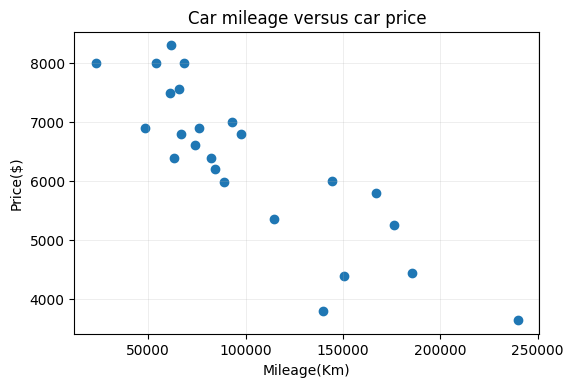

In [182]:
X = np.array([])
Y = np.array([])
with open("data.csv") as csv_file:
	csv_reader = csv.reader(csv_file)
	i = 0
	for row in csv_reader:
		if i != 0:
			X = np.append(X, float(row[0]))
			Y = np.append(Y, float(row[1]))
		i += 1
plt.scatter(X, Y)
plt.xlabel("Mileage(Km)")
plt.ylabel("Price($)")
plt.title("Car mileage versus car price")
plt.grid(linewidth=0.5, alpha=0.3)
plt.show()

Initialize parameters.

In [183]:
theta_0 = 0.0
theta_1 = 0.0
learning_rate = 0.1
m = len(X)
print(m)

24


Define our linear regression model.

In [184]:
def f(X):
	return theta_0 + theta_1 * X

Data Normalization.

In [185]:
maxX = max(X)
maxY = max(Y)
X = X / maxX
Y = Y / maxY

Define ploting function

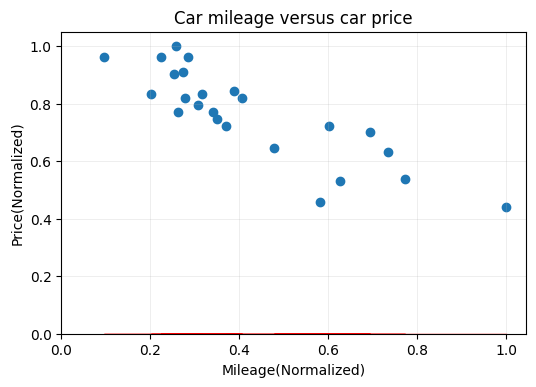

In [186]:
def plot_prices(X, Y):
	plt.scatter(X, Y)
	plt.xlabel("Mileage(Normalized)")
	plt.ylabel("Price(Normalized)")
	plt.title("Car mileage versus car price")
	plt.grid(linewidth=0.5, alpha=0.3)
	plt.plot(X, f(X), color="r", linewidth=1)
	plt.xlim(0)
	plt.ylim(0)
	plt.show()
plot_prices(X, Y)

Define the mean squared error (MSE) cost function.

In [187]:
def cost():
	return (1 / (2 * m)) * sum((f(X) - Y) ** 2)
cost()

0.30383110570624666

Train the model using gradient descent algorithm.

In [188]:
epoch = 1000
history = []
history.append(cost())
while epoch >= 0:
	tmp_theta_0 = (1 / m) * sum(f(X) - Y)
	tmp_theta_1 = (1 / m) * sum(X * (f(X) - Y))
	theta_0 -= learning_rate * tmp_theta_0
	theta_1 -= learning_rate * tmp_theta_1
	history.append(cost())
	epoch -= 1

Plot the data again.

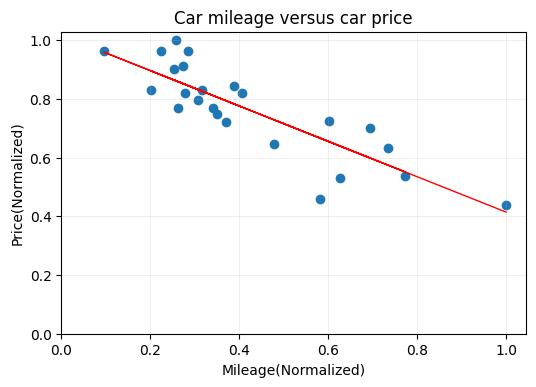

In [189]:
plot_prices(X, Y)

Adjust theta_0 and theta_1.

In [190]:
theta_0 *= maxY
theta_1 *= maxY / maxX

Display cost function values.

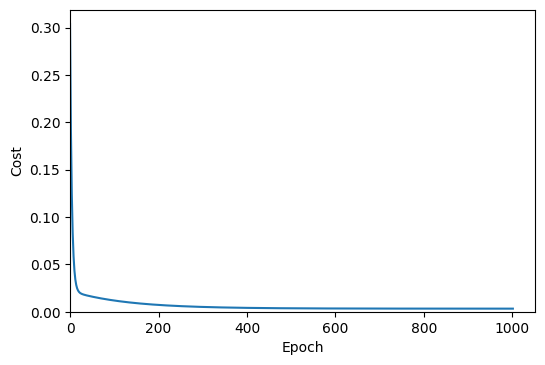

In [191]:
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.xlim(0)
plt.ylim(0)
plt.show()

Do some predictions.

In [192]:
print(f'Actual value: 3650,\tprediction: {f(240000)}')
print(f'Actual value: 4400,\tprediction: {f(150500)}')
print(f'Actual value: 6800,\tprediction: {f(67000)}')


Actual value: 3650,	prediction: 3435.761736097633
Actual value: 4400,	prediction: 5299.744593975638
Actual value: 6800,	prediction: 7038.767707191432
